In [ ]:
from qiskit.transpiler.coupling import CouplingMap

from src.clonk.backend_utils.mock_backends.Corral_backend_v1 import FakeCorral
import numpy as np


def pretty_print(edge_list, simple=False):
    if simple:
        temp = list(edge_list)
        temp2 = []
        for i, j in temp:
            if not (j, i) in temp2:
                temp2.append((i, j))
        edge_list = temp2

    x = CouplingMap(edge_list)

    # black magic errors when I modify the draw function directly in the CouplingMap file so Im just copying the code here to make it work
    import pydot
    from PIL import Image
    import io

    formatter2 = lambda _: dict(dir="none")
    dot_str = x.graph.to_dot(edge_attr=formatter2, graph_attr={"size": "0"})
    dot = pydot.graph_from_dot_data(dot_str)[0]
    png = dot.create_png(prog="sfdp")
    pdf = dot.create_pdf(prog="sfdp")
    # png = dot.create_png(prog="neato")
    return Image.open(io.BytesIO(png))

In [ ]:
# define corral
def corral(num_snails=32, num_levels=2):
    """returns edge list of a corral of size specified
    snails are nodes, edges are qubits"""

    snail_edge_list = []
    for snail0, snail1 in zip(range(num_snails), range(1, num_snails + 1)):
        for i in range(num_levels):
            snail_edge_list.append((snail0, snail1 % num_snails))
    return snail_edge_list

In [ ]:
def snail_to_connectivity(snail_edge_list):
    # Convert snail edge list where nodes are snails and edges are qubits
    # To connectivity edge list where nodes are qubits and edges are coupling
    edge_list = []

    # qubits are coupled to a snail edge if they are both adjacent to a snail node
    for qubit, snail_edge in enumerate(snail_edge_list):
        for temp_qubit, temp_snail_edge in enumerate(snail_edge_list):
            if qubit != temp_qubit and (
                snail_edge[0] in temp_snail_edge or snail_edge[1] in temp_snail_edge
            ):
                edge_list.append((qubit, temp_qubit))
    return edge_list

In [ ]:
c = FakeCorral()
basic_corral_16_2 = corral(16, 2)
basic_corral_16_2 = snail_to_connectivity(basic_corral_16_2)
display(pretty_print(basic_corral_16_2))

# check divideCorralK_math() w/ diff params
new_edges_16_2 = c.divideCorralK_math(basic_corral_16_2, 16, 2)
new_edges_32_2 = c.divideCorralK_math(basic_corral_16_2, 32, 2)
new_edges_16_4 = c.divideCorralK_math(basic_corral_16_2, 16, 4)
new_edges_32_4 = c.divideCorralK_math(basic_corral_16_2, 32, 4)

corral_16_2 = np.append(basic_corral_16_2, new_edges_16_2, axis=0)
corral_32_2 = np.append(basic_corral_16_2, new_edges_32_2, axis=0)
corral_16_4 = np.append(basic_corral_16_2, new_edges_16_4, axis=0)
corral_32_4 = np.append(basic_corral_16_2, new_edges_32_4, axis=0)

display(pretty_print(corral_32_2))
display(pretty_print(corral_16_2))
display(pretty_print(corral_32_4))
display(pretty_print(corral_16_4))

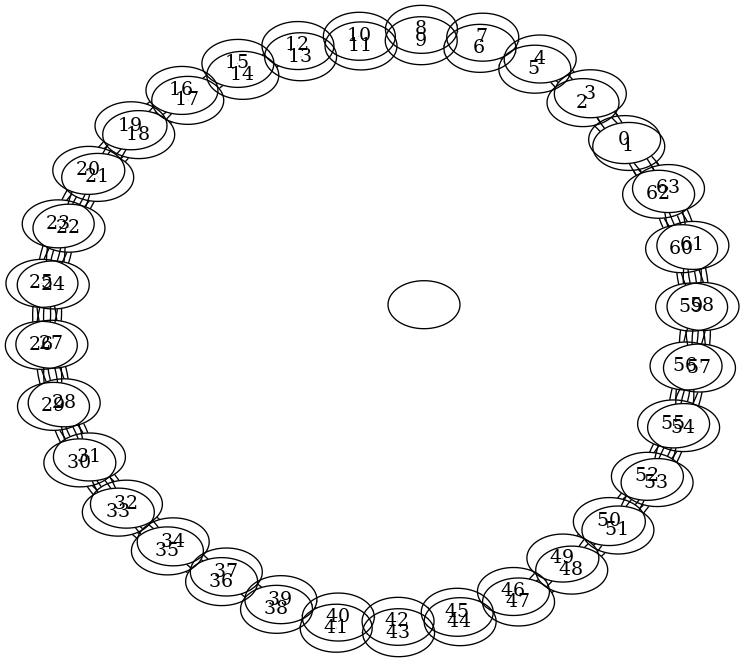

320
[(0, 1), (0, 2), (0, 3), (0, 62), (0, 63), (1, 0), (1, 2), (1, 3), (1, 62), (1, 63), (2, 0), (2, 1), (2, 3), (2, 4), (2, 5), (3, 0), (3, 1), (3, 2), (3, 4), (3, 5), (4, 2), (4, 3), (4, 5), (4, 6), (4, 7), (5, 2), (5, 3), (5, 4), (5, 6), (5, 7), (6, 4), (6, 5), (6, 7), (6, 8), (6, 9), (7, 4), (7, 5), (7, 6), (7, 8), (7, 9), (8, 6), (8, 7), (8, 9), (8, 10), (8, 11), (9, 6), (9, 7), (9, 8), (9, 10), (9, 11), (10, 8), (10, 9), (10, 11), (10, 12), (10, 13), (11, 8), (11, 9), (11, 10), (11, 12), (11, 13), (12, 10), (12, 11), (12, 13), (12, 14), (12, 15), (13, 10), (13, 11), (13, 12), (13, 14), (13, 15), (14, 12), (14, 13), (14, 15), (14, 16), (14, 17), (15, 12), (15, 13), (15, 14), (15, 16), (15, 17), (16, 14), (16, 15), (16, 17), (16, 18), (16, 19), (17, 14), (17, 15), (17, 16), (17, 18), (17, 19), (18, 16), (18, 17), (18, 19), (18, 20), (18, 21), (19, 16), (19, 17), (19, 18), (19, 20), (19, 21), (20, 18), (20, 19), (20, 21), (20, 22), (20, 23), (21, 18), (21, 19), (21, 20), (21, 22), (

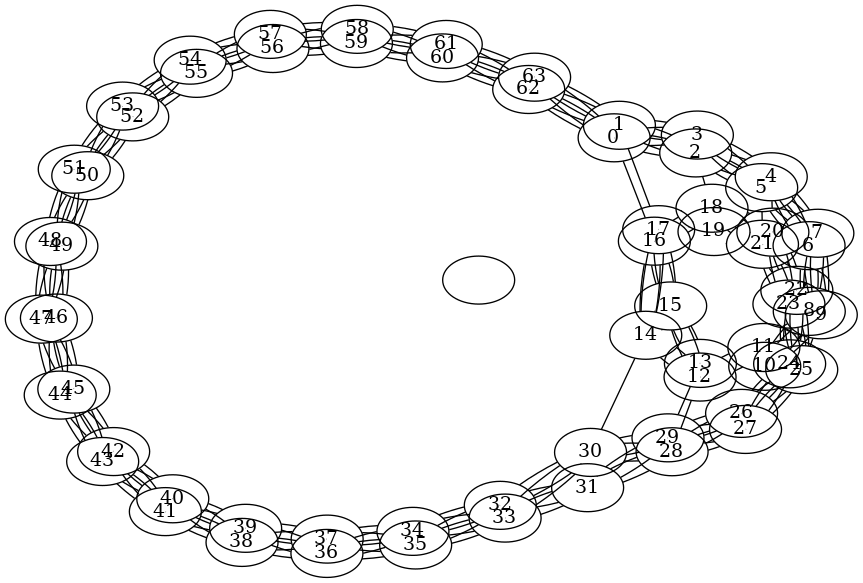

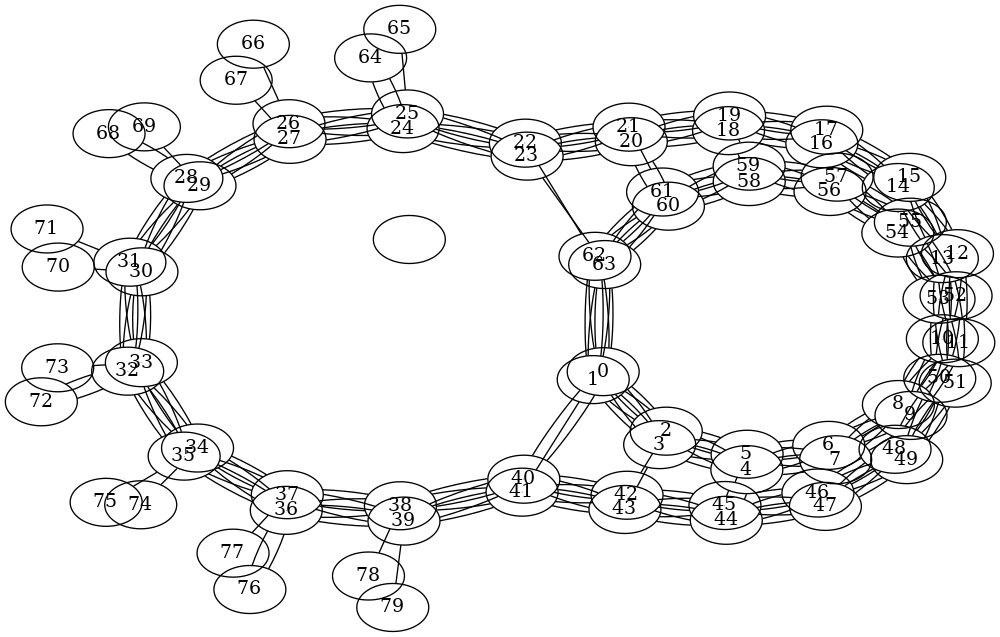

In [24]:
c = FakeCorral()
basic_corral_32_2 = corral(32, 2)
basic_corral_32_2 = snail_to_connectivity(basic_corral_32_2)
display(pretty_print(basic_corral_32_2))
print(len(basic_corral_32_2))
new_edges_32_12 = c.divideCorralK_math(basic_corral_32_2, 32, 12)
new_edges_80_50 = c.divideCorralK_math(basic_corral_32_2, 80, 50)


corral_32_2 = np.append(basic_corral_32_2, new_edges_32_2, axis=0)
corral_80_50 = np.append(basic_corral_32_2, new_edges_80_50, axis=0)
print(basic_corral_32_2)
print(new_edges_32_2)

display(pretty_print(corral_32_2))
display(pretty_print(corral_80_50))

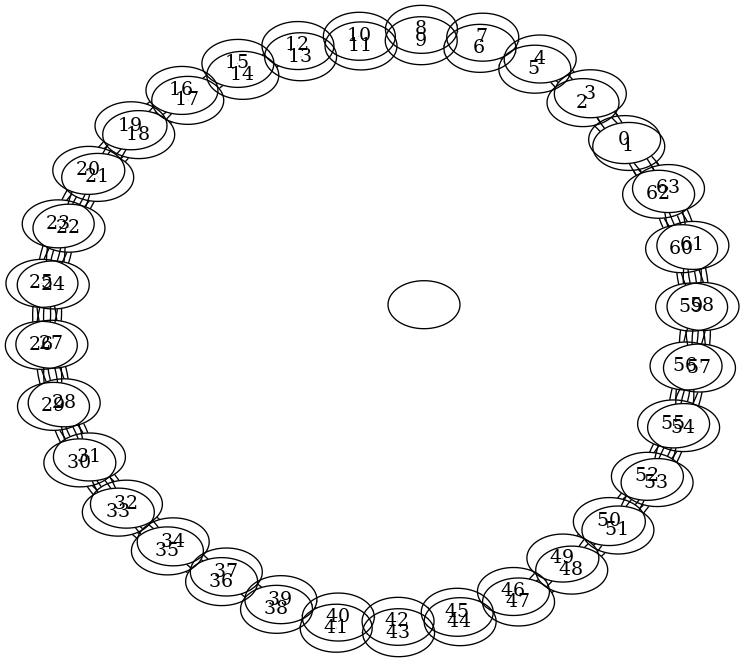

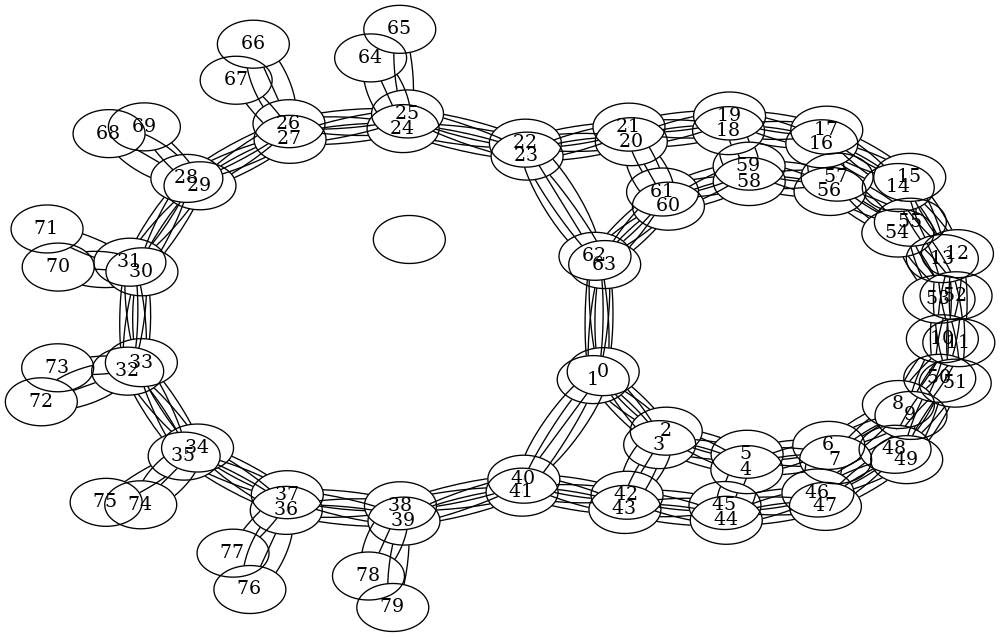

In [40]:
c = FakeCorral()
basic_corral_32_2 = corral(32, 2)
basic_corral_32_2 = snail_to_connectivity(basic_corral_32_2)
display(pretty_print(basic_corral_32_2))
new_edges= c.divideCorralK_math(basic_corral_32_2, 80, 100)

corral_new = np.append(basic_corral_32_2, new_edges, axis=0)

display(pretty_print(corral_new))

In [ ]:
basic_corral_16_2 = corral(16, 2)
basic_corral_16_2 = snail_to_connectivity(basic_corral_16_2)
display(pretty_print(basic_corral_16_2))

# check divideCorralK_math() w/ diff params
new_edges_32_2 = c.divideCorralK_complete(basic_corral_16_2, 32, 2)
new_edges_32_32 = c.divideCorralK_complete(basic_corral_16_2, 32, 32)
new_edges_32_16 = c.divideCorralK_complete(basic_corral_16_2, 32, 16)
new_edges_32_8 = c.divideCorralK_complete(basic_corral_16_2, 32, 8)

corral_32_2 = np.append(basic_corral_16_2, new_edges_32_2, axis=0)
corral_32_32 = np.append(basic_corral_16_2, new_edges_32_32, axis=0)
corral_32_16 = np.append(basic_corral_16_2, new_edges_32_16, axis=0)
corral_32_8 = np.append(basic_corral_16_2, new_edges_32_8, axis=0)

display(pretty_print(corral_32_2))
display(pretty_print(corral_32_32))
display(pretty_print(corral_32_16))
display(pretty_print(corral_32_8))

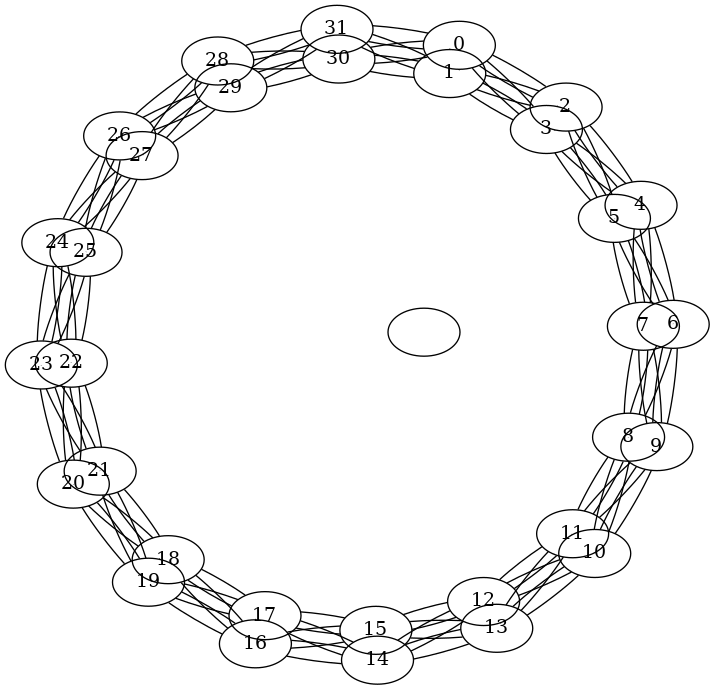

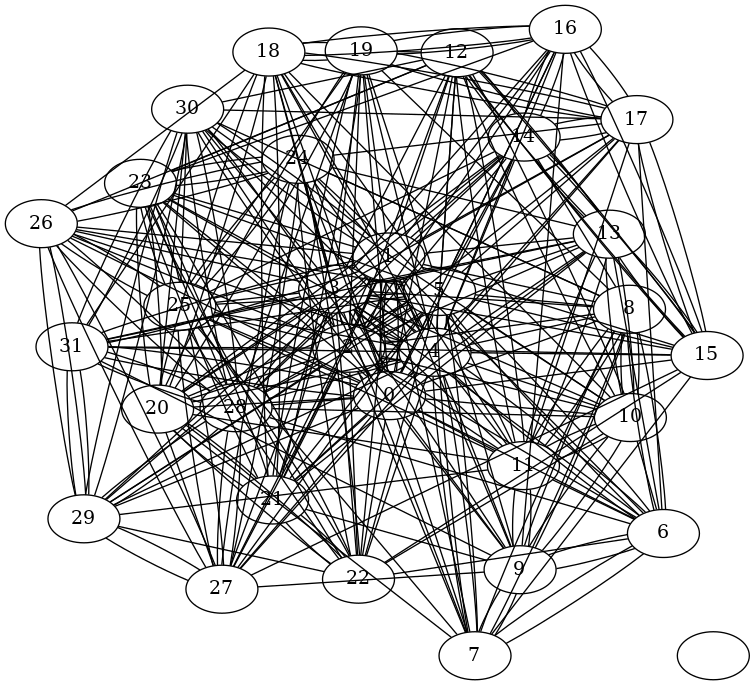

In [42]:
basic_corral_16_2 = corral(16, 2)
basic_corral_16_2 = snail_to_connectivity(basic_corral_16_2)
display(pretty_print(basic_corral_16_2))

# check divideCorralK_math() w/ diff params
new_edges_32_2 = c.divideCorralK_complete(basic_corral_16_2, 32, 200)
corral_32_2 = np.append(basic_corral_16_2, new_edges_32_2, axis=0)

display(pretty_print(corral_32_2))

In [45]:
#test benchmarking for diff amounto of qubits and different connectivities
from src.clonk.benchmark_suite.backend_suite_corral import simple_backends_v3

print([backend.label for backend in simple_backends_v3])

['Corral_N_16_(0,1)_K_16_v_1-smallv3', 'Corral_N_64_(0,1)_K_64_v_1-smallv3', 'Corral_N_128_(0,1)_K_128_v_1-smallv3', 'Corral_N_128_(0,1)_K_256_v_1-smallv3']


In [46]:
from src.clonk.benchmark_suite.circuit_suite import circuits
from src.clonk.benchmark_suite.main_plotting import benchmark, plot_wrap

for circuit_gen in circuits.values():
    benchmark(
        backends=simple_backends_v3,
        circuit_generator=circuit_gen,
        q_range=[4, 6, 8, 12, 14, 16],
        continuously_save=1,
        overwrite=0,  # NOTE: turn this to 1 if you want to scrap the saved data and recollect a new batch
        repeat=1,
    )

# NOTE when plotting use motivation = 1 to plot SWAP counts, and motivation = 0 to plot gate durations
plot_wrap(simple_backends_v3, circuits.keys(), motivation=True, plot_average=True)

Starting benchmark for Quantum_Volume
Transpiler qc4 for Corral_N_16_(0,1)_K_16_v_1-smallv3


TranspilerError: "Unable to map source basis {('cx', 2), ('u3', 1)} to target basis {'snapshot', 'delay', 'ry', 'barrier', 'reset', 'measure', 'id', 'riswap', 'rx'} over library <qiskit.circuit.equivalence.EquivalenceLibrary object at 0x7f14e93695b0>."